In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')

In [2]:
data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [4]:
data.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['Price'] = imputer.fit_transform(data[['Price']])

In [6]:
data.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.240000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.378250e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.690000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,6.992500e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

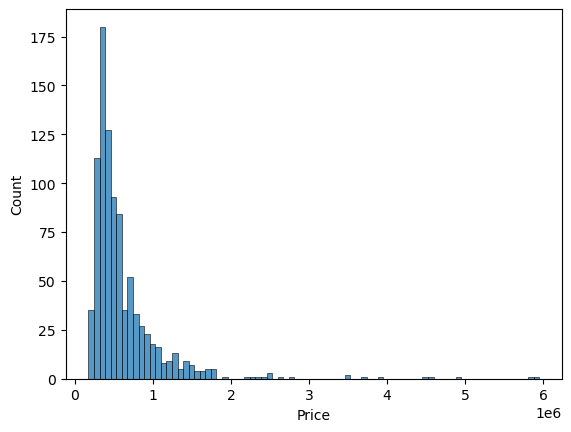

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Price'])

In [8]:
data.duplicated().sum()

0

In [9]:
data.drop(columns=['Unnamed: 0', 'Address','Zip'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   924 non-null    float64
 1   Area    924 non-null    int64  
 2   Room    924 non-null    int64  
 3   Lon     924 non-null    float64
 4   Lat     924 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.2 KB


In [11]:
data

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...
919,750000.0,117,1,4.927757,52.354173
920,350000.0,72,3,4.890612,52.414587
921,350000.0,51,3,4.856935,52.363256
922,599000.0,113,4,4.965731,52.375268


In [12]:
def num_cols_vis(col):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

In [13]:
numerical_columns = data.select_dtypes(include=[np.number]).columns

C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


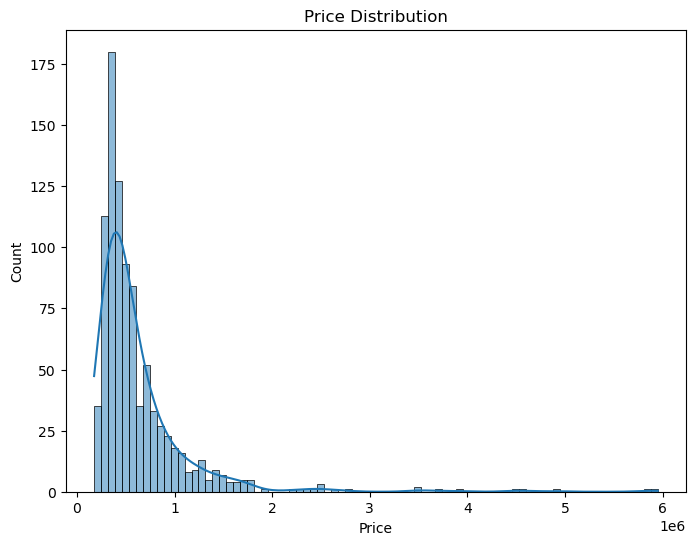

C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


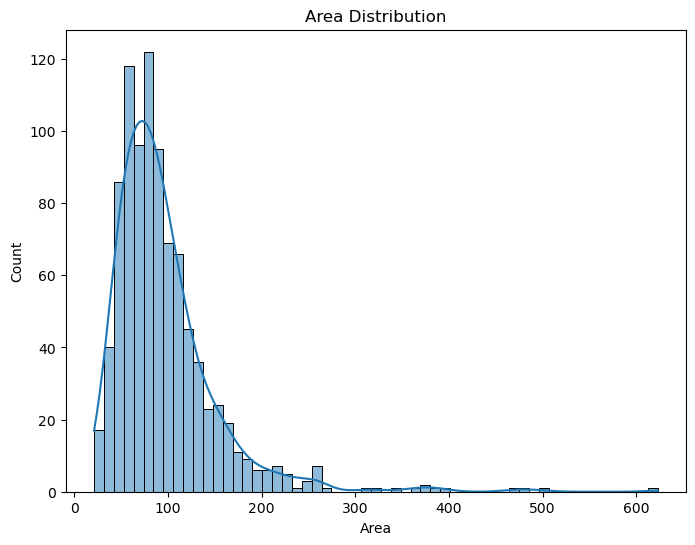

C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


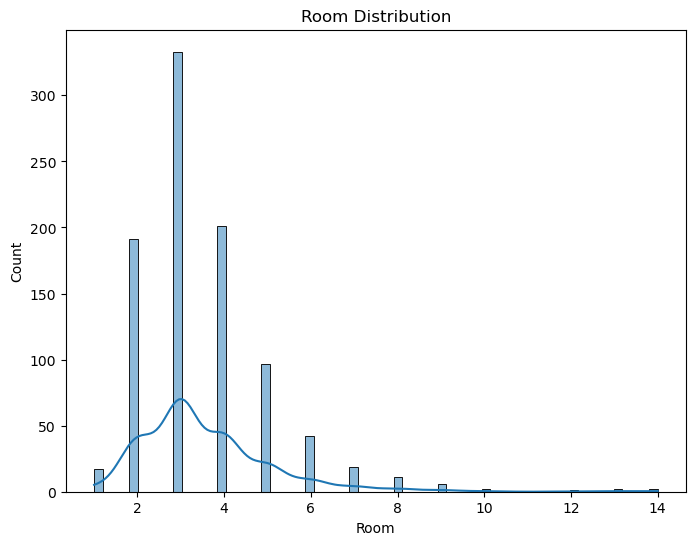

C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


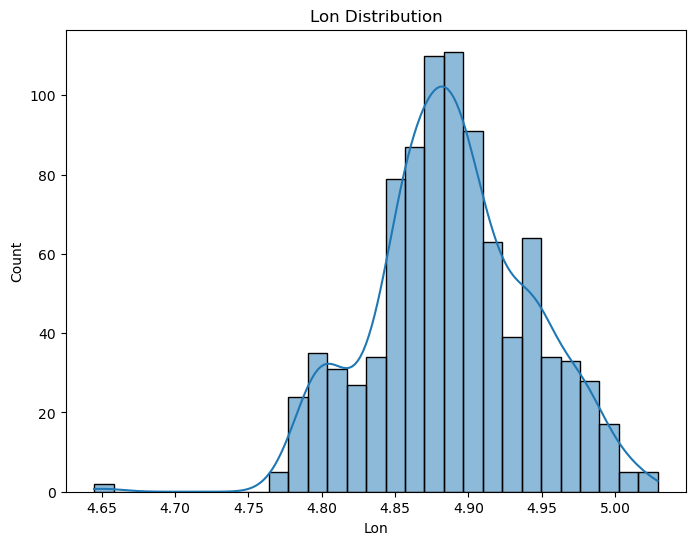

C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


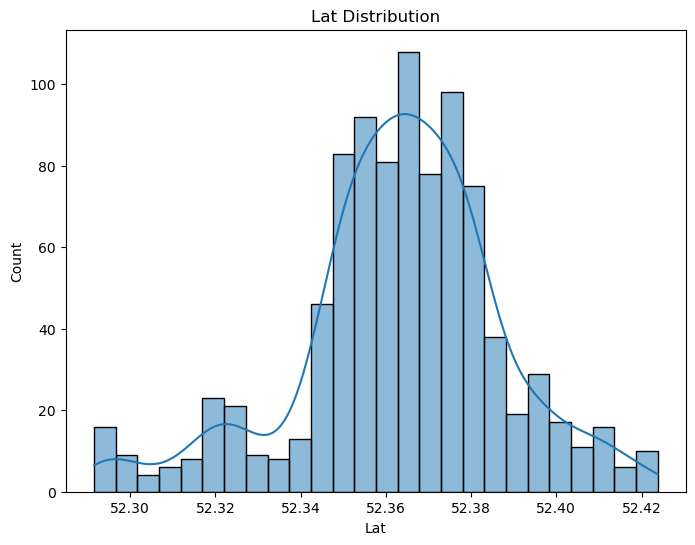

In [14]:
for col in numerical_columns:
    num_cols_vis(col)

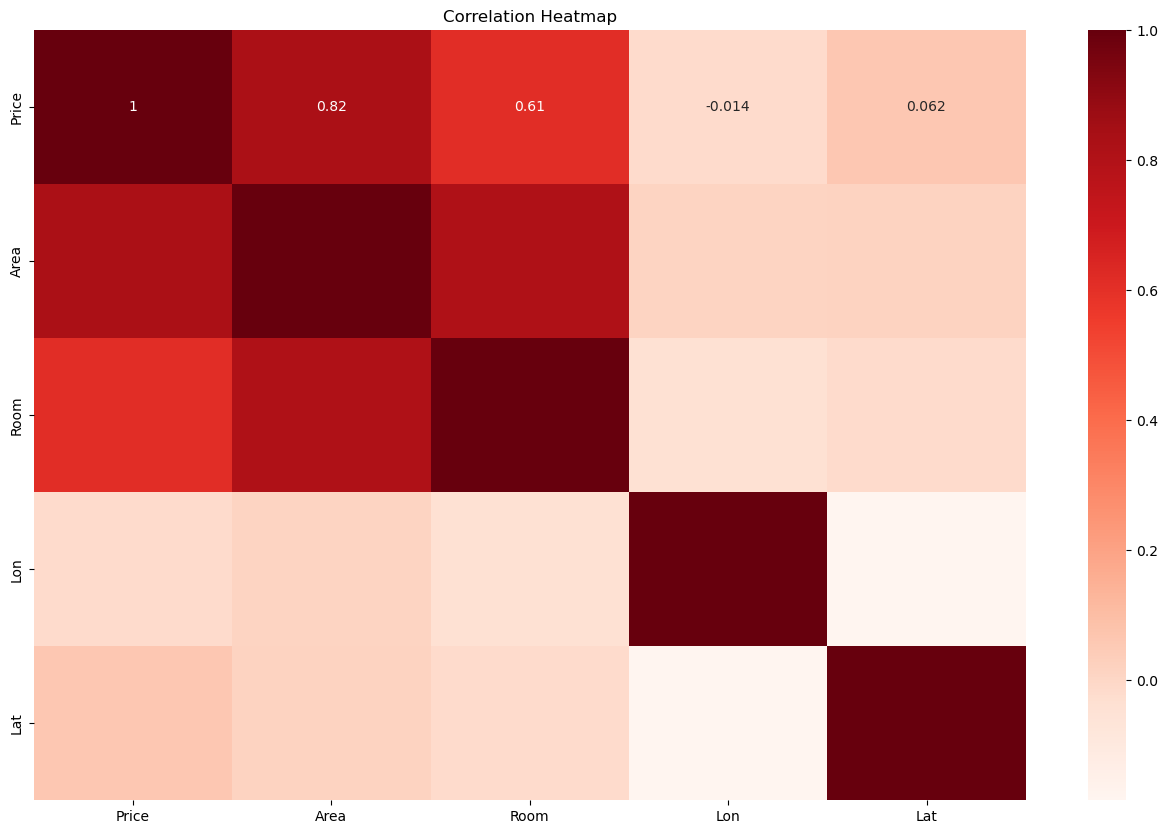

In [15]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
x = data.drop(columns=['Price'])
y = data['Price']

In [17]:
x

,Area,Room,Lon,Lat
0,64,3,4.907736,52.356157
1,60,3,4.850476,52.348586
2,109,4,4.944774,52.343782
3,128,6,4.789928,52.343712
4,138,5,4.902503,52.410538
...,...,...,...,...
919,117,1,4.927757,52.354173
920,72,3,4.890612,52.414587
921,51,3,4.856935,52.363256
922,113,4,4.965731,52.375268


In [18]:
y

0      685000.0
1      475000.0
2      850000.0
3      580000.0
4      720000.0
         ...   
919    750000.0
920    350000.0
921    350000.0
922    599000.0
923    300000.0
Name: Price, Length: 924, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(739, 4)
(185, 4)
(739,)
(185,)


In [22]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Binarizer

In [24]:
linreg_model = LinearRegression().fit(X_train, y_train)
linreg_pred = linreg_model.predict(X_test)

print(linreg_model.score(X_train, y_train))

print(linreg_model.score(X_test, y_test))
print(mean_squared_error(y_test, linreg_pred))

0.6284765537204389
0.7951276660515922
102962582194.2494


In [25]:
### Random Forest
rndf_model = RandomForestRegressor(n_estimators = 150).fit(X_train, y_train)
rndf_predict = rndf_model.predict(X_test)

### inner loss/ inner R^2
print(rndf_model.score(X_train, y_train))
### outer loss/ out-of-sample R^2
print(rndf_model.score(X_test, y_test))
print(mean_squared_error(y_test, rndf_predict))

0.9471316879608569
0.8107600234954149
95106236453.56587


In [26]:
knn_model = KNeighborsRegressor(n_neighbors = 7).fit(X_train, y_train)
knn_predict = knn_model.predict(X_test)

### inner loss/ inner R^2
print(knn_model.score(X_train, y_train))
### outer loss/ out-of-sample R^2
print(knn_model.score(X_test, y_test))
print(mean_squared_error(y_test, knn_predict))

0.6779808270648617
0.7465009176954485
127400901795.36926
